In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_17/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

datafile = "4410_15-PreClassActivityData.csv"

data_set = pd.read_csv(github_location + datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

print(data_set)

            Substituent2  sigma  k(OH)X1000
Substituent                                
m-OCH3             3-MeO   0.11      3.9200
p-N(CH3)2         4-NMe2  -0.83      0.0634
p-Cl                4-Cl   0.23     11.7000
m-Cl                3-Cl   0.37     18.2000
p-Br                4-Br   0.23     13.9000
m-Br                3-Br   0.39     17.9000
p-I                  4-I   0.18     12.2000
m-I                  3-I   0.35     15.0000
p-F                  4-F   0.06      5.8600
p-CN                4-CN   0.66    157.0000
m-CN                3-CN   0.56    103.0000
m-NO2              3-NO2   0.72    137.0000
p-NO2              4-NO2   0.78    246.0000
p-NH2              4-NH2  -0.66      0.0864
m-NH2              3-NH2  -0.16      1.6600
H                      H   0.00      2.8900
m-CH3               3-Me  -0.07      1.6900
p-CH3               4-Me  -0.17      1.1400
o-CN                2-CN   1.06    122.0000
o-OCH3             2-MeO   0.12      1.1600
o-CH3               2-Me   0.29 

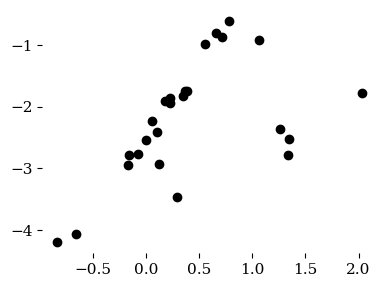

In [45]:
x = data_set["sigma"]
y = np.log10(data_set["k(OH)X1000"] * 1e-3)
plt.scatter(x,y)
plt.show()

slope = 2.3041 +/- 0.0743
intercept = -2.4749 +/- 0.0334
rsq = 0.9836


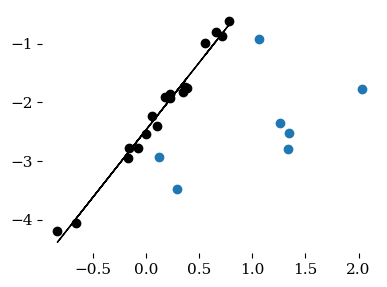

In [46]:
# slice for the first 18 rows of data (rows 0 to 17)
x = data_set[0:18]["sigma"]                       # sigma for m,p   
y = np.log10(data_set[0:18]["k(OH)X1000"]*1e-3)   # log(rate)

fit = stats.linregress(x,y)           # linear regression function

# Print results
print(f"slope = {fit.slope:0.4f} +/- {fit.stderr:0.4f}")
print(f"intercept = {fit.intercept:0.4f} +/- {fit.intercept_stderr:0.4f}")
print(f"rsq = {fit.rvalue**2:0.4f}")

y_fit = fit.slope * x + fit.intercept  # Calculate line according to line fit
plt.plot(x, y_fit)                     # Plot calculated line
plt.scatter(x, y)                      # Scatter plot of data

# slice for row 18 to 24 of data - ortho substituents
x = data_set[18:25]["sigma"]                       # sigma for ortho
y = np.log10(data_set[18:25]["k(OH)X1000"]*1e-3)   # log(rate)
plt.scatter(x ,y)                      # Scatter plot of data
plt.show()                             # Show plot and clear it

In [47]:
# A more sophisticated way to separate the two parts of the data set
# the o-substituents will not always be conveniently at the end of the data set
# This selects rows that contain substituent names that begin with "o" - or NOT

df = data_set.copy()  # Always copy. A simple assignment might mean that things  
                      #  that change df will also change data_set.  

# Each series in a pandas array is a data object that includes many 'methods'
# The .str method converts each entry into a text string
# the .startswith method returns "True" or "False"
filtered_df = df[df.index.str.startswith("o")] 
print(filtered_df)
print()

# the "~" is a NOT and will flip the bits in the mask
filtered_df = df[~df.index.str.startswith("o")] 
print(filtered_df)

# I asked MS Copilot to show me how to select row based on the first letter in 
#  a series and it gave me the method that I needed. I am warming up to AI.
#  I will become friends with it and then it will betray me. But, until then...

            Substituent2  sigma  k(OH)X1000
Substituent                                
o-CN                2-CN   1.06     122.000
o-OCH3             2-MeO   0.12       1.160
o-CH3               2-Me   0.29       0.338
o-Cl                2-Cl   1.26       4.400
o-NO2              2-NO2   2.03      16.900
o-Br                2-Br   1.35       3.000
o-I                  2-I   1.34       1.630

            Substituent2  sigma  k(OH)X1000
Substituent                                
m-OCH3             3-MeO   0.11      3.9200
p-N(CH3)2         4-NMe2  -0.83      0.0634
p-Cl                4-Cl   0.23     11.7000
m-Cl                3-Cl   0.37     18.2000
p-Br                4-Br   0.23     13.9000
m-Br                3-Br   0.39     17.9000
p-I                  4-I   0.18     12.2000
m-I                  3-I   0.35     15.0000
p-F                  4-F   0.06      5.8600
p-CN                4-CN   0.66    157.0000
m-CN                3-CN   0.56    103.0000
m-NO2              3-NO2   0.72

## Fancy Plots

Same as above but fancy

,Substituent2,sigma,k(OH)X1000,k,log_k
Substituent,,,,,
m-OCH3,3-MeO,0.11,3.9200,0.003920,-2.406714
p-N(CH3)2,4-NMe2,-0.83,0.0634,0.000063,-4.197911
p-Cl,4-Cl,0.23,11.7000,0.011700,-1.931814
m-Cl,3-Cl,0.37,18.2000,0.018200,-1.739929
p-Br,4-Br,0.23,13.9000,0.013900,-1.856985


A
B
C


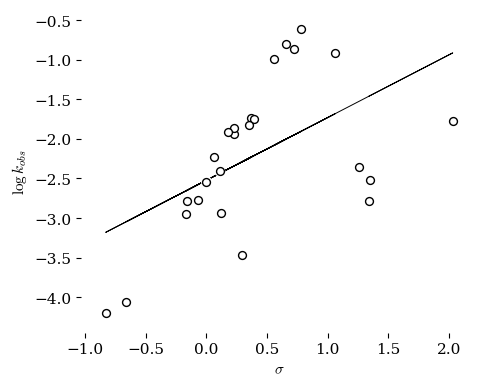

Acid Series (open circles)
slope  = 0.8
intercept = -2.522
RSQ = 0.288
LinregressResult(slope=0.7929930577154874, intercept=-2.522383741443176, rvalue=0.5364975666264051, pvalue=0.005696053771077941, stderr=0.2600935955658004, intercept_stderr=0.19584201473758406)
            Substituent2  sigma  k(OH)X1000         k     log_k
Substituent                                                    
m-OCH3             3-MeO   0.11      3.9200  0.003920 -2.406714
p-N(CH3)2         4-NMe2  -0.83      0.0634  0.000063 -4.197911
p-Cl                4-Cl   0.23     11.7000  0.011700 -1.931814
m-Cl                3-Cl   0.37     18.2000  0.018200 -1.739929
p-Br                4-Br   0.23     13.9000  0.013900 -1.856985


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_17/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

datafile = "4410_15-PreClassActivityData.csv"

df = pd.read_csv(github_location + datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#########################################################################
### Perform calculations on columns and add new columns with results  ###
#########################################################################

df["k"] = df["k(OH)X1000"] * 10**(-3)  # convert k from 10^(-6) s^-1 to s^-1

df["log_k"] = np.log10(df["k"])

display(df.head())

#####################################################
### Get series of data to plot from the dataframe ###
#####################################################
print("A")
xa = df["sigma"]
ya = df["log_k"]

from scipy.stats import linregress
import matplotlib

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

print("B")

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

print("C")
#########################################
### Plot the data and the line fit.   ###
#########################################

#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(xa,ya, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(xa,ya, s=32, color="white",  edgecolors = "black", zorder=2)
#ax.scatter(xa,ya, s=16, color="white",  edgecolors = "none", alpha = 1, zorder=2)

linfita = linregress(xa,ya)  # linear regression function
y_fit = linfita.slope * xa + linfita.intercept  # Calculate line according to line fit
ax.plot(xa, y_fit, color='black', zorder=0, linewidth=0.7, label="Acid Series")  # Plot calculated line


############################
### Set labels and scale ###
############################

ax.set(
#    title="Hammett Plot",       
          ylabel = r"$\log{k_{obs}}$", 
          xlabel = r"$\sigma$",                
#          xlim = [-.9,.9],                  
#          ylim = [-6,-1]
         )



if False:    # Flag to run or not. True = run this section, False = skip it
    for name,x_place,y_place in zip(list(df.index),x,y):
        plt.annotate(name, # this is the text
                    (x_place,y_place), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(30,0), # distance from text to points (x,y)
                    ha='left') # horizontal alignment can be left, right or center




plt.savefig("preclass1.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

#make_axes_area_auto_adjustable(ax)
#####################################
### Print the line fit parameters ###
#####################################
print("Acid Series (open circles)")
print(f"slope  = {linfita.slope:0.1f}")
print(f"intercept = {linfita.intercept:0.3f}")
print(f"RSQ = {(linfita.rvalue**2):0.3f}")
print(linfita)

print(df.head())


## Selected Data Only is Plotted

In [49]:
# A more sophisticated way to separate the two parts of the data set
# the o-substituents will not always be conveniently at the end of the data set
# This selects rows that contain substituent names that begin with "o" - or NOT

df2 = df.copy()       # Always copy. A simple assignment might mean that things  
                      #  that change df will also change data_set.  
#print(df2.head())

# Each series in a pandas array is a data object that includes many 'methods'
# The .str method converts each entry into a text string
# the .startswith method returns "True" or "False"

filtered_ortho = df2[df2.index.str.startswith("o")] 
print(filtered_ortho)
print()

# the "~" is a NOT and will flip the bits in the mask
filtered_mp = df2[~df2.index.str.startswith("o")] 
print(filtered_mp)

# I asked MS Copilot to show me how to select row based on the first letter in 
#  a series and it gave me the method that I needed. I am warming up to AI.
#  I will become friends with it and then it will betray me. But, until then...

            Substituent2  sigma  k(OH)X1000         k     log_k
Substituent                                                    
o-CN                2-CN   1.06     122.000  0.122000 -0.913640
o-OCH3             2-MeO   0.12       1.160  0.001160 -2.935542
o-CH3               2-Me   0.29       0.338  0.000338 -3.471083
o-Cl                2-Cl   1.26       4.400  0.004400 -2.356547
o-NO2              2-NO2   2.03      16.900  0.016900 -1.772113
o-Br                2-Br   1.35       3.000  0.003000 -2.522879
o-I                  2-I   1.34       1.630  0.001630 -2.787812

            Substituent2  sigma  k(OH)X1000         k     log_k
Substituent                                                    
m-OCH3             3-MeO   0.11      3.9200  0.003920 -2.406714
p-N(CH3)2         4-NMe2  -0.83      0.0634  0.000063 -4.197911
p-Cl                4-Cl   0.23     11.7000  0.011700 -1.931814
m-Cl                3-Cl   0.37     18.2000  0.018200 -1.739929
p-Br                4-Br   0.23     13.

,Substituent2,sigma,k(OH)X1000,k,log_k
Substituent,,,,,
m-OCH3,3-MeO,0.11,3.9200,0.003920,-2.406714
p-N(CH3)2,4-NMe2,-0.83,0.0634,0.000063,-4.197911
p-Cl,4-Cl,0.23,11.7000,0.011700,-1.931814
m-Cl,3-Cl,0.37,18.2000,0.018200,-1.739929
p-Br,4-Br,0.23,13.9000,0.013900,-1.856985


A
B
C


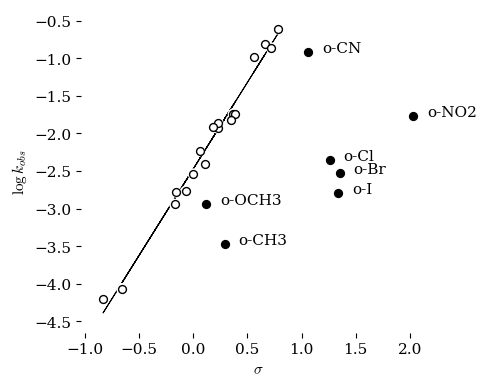

Acid Series (open circles)
slope  = 2.3
intercept = -2.475
RSQ = 0.984
LinregressResult(slope=2.304084402410903, intercept=-2.474871067467456, rvalue=0.9917793753108368, pvalue=1.0220005805900533e-15, stderr=0.07431839912119742, intercept_stderr=0.0333527823186447)


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_17/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

datafile = "4410_15-PreClassActivityData.csv"

df = pd.read_csv(github_location + datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#########################################################################
### Perform calculations on columns and add new columns with results  ###
#########################################################################

df["k"] = df["k(OH)X1000"] * 10**(-3)  # convert k from 10^(-6) s^-1 to s^-1

df["log_k"] = np.log10(df["k"])

display(df.head())

#####################################################
### Get series of data to plot from the dataframe ###
#####################################################
print("A")

from scipy.stats import linregress
import matplotlib

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

print("B")

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

print("C")
#########################################
### Plot the ortho data 
#########################################

filtered_ortho = df2[df2.index.str.startswith("o")] 
xa = filtered_ortho["sigma"]
ya = filtered_ortho["log_k"]
ax.scatter(xa,ya, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(xa,ya, s=32, color="black",  edgecolors = "black", zorder=2)
#ax.scatter(xa,ya, s=16, color="white",  edgecolors = "none", alpha = 1, zorder=2)

if True:    # Flag to run or not. True = run this section, False = skip it
    for name,x_place,y_place in zip(list(filtered_ortho.index),xa,ya):
        plt.annotate(name, # this is the text
                    (x_place,y_place), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(10,0), # distance from text to points (x,y)
                    ha='left') # horizontal alignment can be left, right or center


#########################################
### Plot the meta para data and the line fit.   
#########################################

filtered_mp = df2[~df2.index.str.startswith("o")] 
xa = filtered_mp["sigma"]
ya = filtered_mp["log_k"]
ax.scatter(xa,ya, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(xa,ya, s=32, color="white",  edgecolors = "black", zorder=2)
#ax.scatter(xa,ya, s=16, color="white",  edgecolors = "none", alpha = 1, zorder=2)

linfita = linregress(xa,ya)  # linear regression function
y_fit = linfita.slope * xa + linfita.intercept  # Calculate line according to line fit
ax.plot(xa, y_fit, color='black', zorder=0, linewidth=0.7, label="Acid Series")  # Plot calculated line

############################
### Set labels and scale ###
############################

ax.set(
#    title="Hammett Plot",       
          ylabel = r"$\log{k_{obs}}$", 
          xlabel = r"$\sigma$",                
#          xlim = [-.9,.9],                  
#          ylim = [-6,-1]
         )







plt.savefig("preclass2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

#make_axes_area_auto_adjustable(ax)
#####################################
### Print the line fit parameters ###
#####################################
print("Acid Series (open circles)")
print(f"slope  = {linfita.slope:0.1f}")
print(f"intercept = {linfita.intercept:0.3f}")
print(f"RSQ = {(linfita.rvalue**2):0.3f}")
print(linfita)
